<p>The following work is an analysis of the Predicting Red Hat Business Value dataset 
provided by Kaggle at:https://www.kaggle.com/c/predicting-red-hat-business-value/data.</p>
<p>The main task is to predict the commercial value of a person based on the types of activities he has performed.</p>

In [61]:
from __future__ import division , print_function
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import pandas as pd
import seaborn as sns
%matplotlib inline

# Exploratory data analysis.

First exploration

# Load Data

Import the data and join them.

In [2]:
train = pd.read_csv('act_train.csv', parse_dates=['date'])
test = pd.read_csv('act_test.csv', parse_dates=['date'])
people = pd.read_csv('people.csv', parse_dates=['date'])
data_train = pd.merge(train, people, on='people_id')
data_test = pd.merge(test, people, on='people_id')
del train, test

In [3]:
print("There are:",people.shape[0],"people.")

There are: 189118 people.


In [4]:
print("There are:",data_train.shape[0],"activities.")

There are: 2197291 activities.


In [5]:
data_train.head()

,people_id,activity_id,date_x,activity_category,char_1_x,char_2_x,char_3_x,char_4_x,char_5_x,char_6_x,...,char_29,char_30,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38
0,ppl_100,act2_1734928,2023-08-26,type 4,NaN,NaN,NaN,NaN,NaN,NaN,...,False,True,True,False,False,True,True,True,False,36
1,ppl_100,act2_2434093,2022-09-27,type 2,NaN,NaN,NaN,NaN,NaN,NaN,...,False,True,True,False,False,True,True,True,False,36
2,ppl_100,act2_3404049,2022-09-27,type 2,NaN,NaN,NaN,NaN,NaN,NaN,...,False,True,True,False,False,True,True,True,False,36
3,ppl_100,act2_3651215,2023-08-04,type 2,NaN,NaN,NaN,NaN,NaN,NaN,...,False,True,True,False,False,True,True,True,False,36
4,ppl_100,act2_4109017,2023-08-26,type 2,NaN,NaN,NaN,NaN,NaN,NaN,...,False,True,True,False,False,True,True,True,False,36


In [6]:
data_test.head()

,people_id,activity_id,date_x,activity_category,char_1_x,char_2_x,char_3_x,char_4_x,char_5_x,char_6_x,...,char_29,char_30,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38
0,ppl_100004,act1_249281,2022-07-20,type 1,type 5,type 10,type 5,type 1,type 6,type 1,...,True,True,True,True,True,True,True,True,True,76
1,ppl_100004,act2_230855,2022-07-20,type 5,NaN,NaN,NaN,NaN,NaN,NaN,...,True,True,True,True,True,True,True,True,True,76
2,ppl_10001,act1_240724,2022-10-14,type 1,type 12,type 1,type 5,type 4,type 6,type 1,...,False,True,True,True,True,True,True,True,True,90
3,ppl_10001,act1_83552,2022-11-27,type 1,type 20,type 10,type 5,type 4,type 6,type 1,...,False,True,True,True,True,True,True,True,True,90
4,ppl_10001,act2_1043301,2022-10-15,type 5,NaN,NaN,NaN,NaN,NaN,NaN,...,False,True,True,True,True,True,True,True,True,90


Variable range of dates.
<br>date_x is the activity date.
<br>date_y is the people date.

In [7]:
for date in ['date_x', 'date_y']:
    print('Start date of ' + date + ': ' + str(data_train[date].min().date()))
    print('  End data of ' + date + ': ' + str(data_train[date].max().date()))
    print('     Range of ' + date + ': ' + str(data_train[date].max() - data_train[date].min()) + '\n')

Start date of date_x: 2022-07-17
  End data of date_x: 2023-08-31
     Range of date_x: 410 days 00:00:00

Start date of date_y: 2020-05-18
  End data of date_y: 2023-08-31
     Range of date_y: 1200 days 00:00:00



We see that the range of data_y is three times larger than that of data_x and also ends the same day.
This could say that information was collected about people but not associated with jobs, in the last year began to register jobs but also continued to register people.
And lastly it could be said that the same day was stopped collecting data.


<h4>Check if they are unique jobs.</h4>

In [8]:
total_job = data_train['activity_id'].shape[0]
total_unique_jobs = data_train['activity_id'].unique().shape[0]
if total_job == total_unique_jobs:
    print("Each activity corresponds to a single person.")

Each activity corresponds to a single person.


# Analyzing some characteristics.

Here I'm grouping the activities by date, and then for each date working out the number of activities that happened on that day as well as the probability of class 1 on that day.

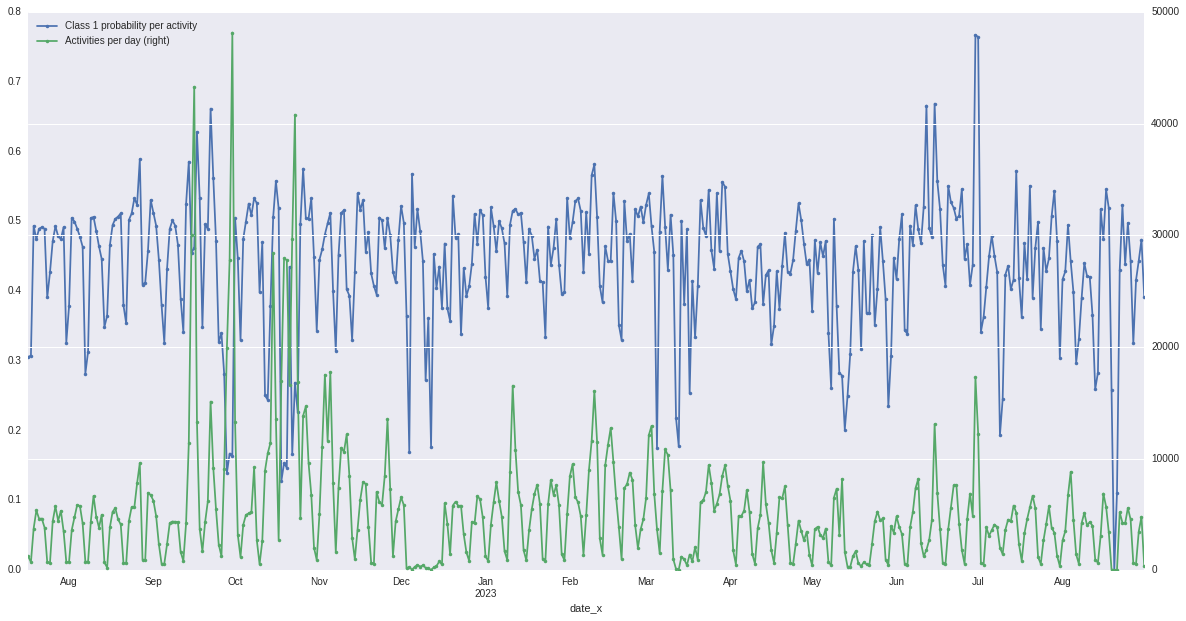

In [9]:
s = (data_train['date_x'].dt.weekday >= 5).astype(int).values
date_x = pd.DataFrame()
date_x['Class 1 probability per activity'] = data_train.groupby('date_x')['outcome'].mean()
date_x['Activities per day'] = data_train.groupby('date_x')['outcome'].size()
date_x.plot(secondary_y='Activities per day',figsize=(20, 10),marker = '.' )

In [10]:
# This is the information that plot the line blue.
date_act = pd.read_csv("act_train.csv", index_col='date')

df = date_act.loc['2023-08-26',['outcome']]
df[df==1].count()/df.count()

outcome    0.443469
dtype: float64

From this graph you can see that there is a pattern during the week where on weekends there are far fewer events than the rest of the days, and the probability of class 1 jobs falls to 0.4 0.3.
There are also very large peaks around the months of Sep-Oct.
<p>Let's analyze the dates of the date_y.</p>

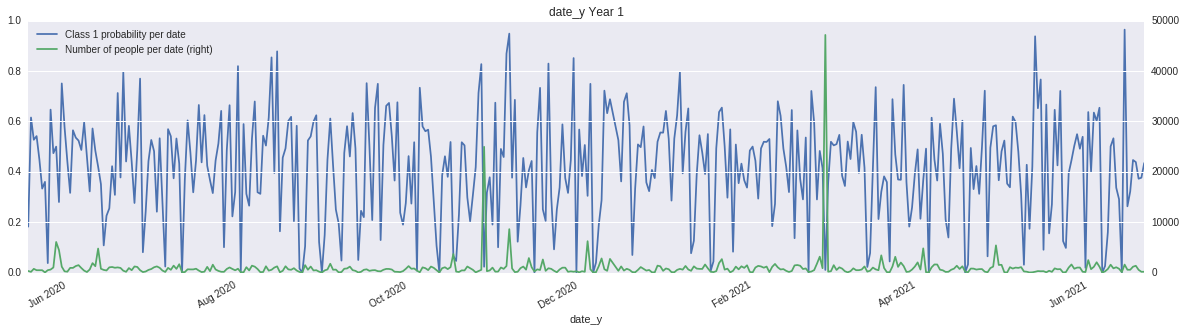

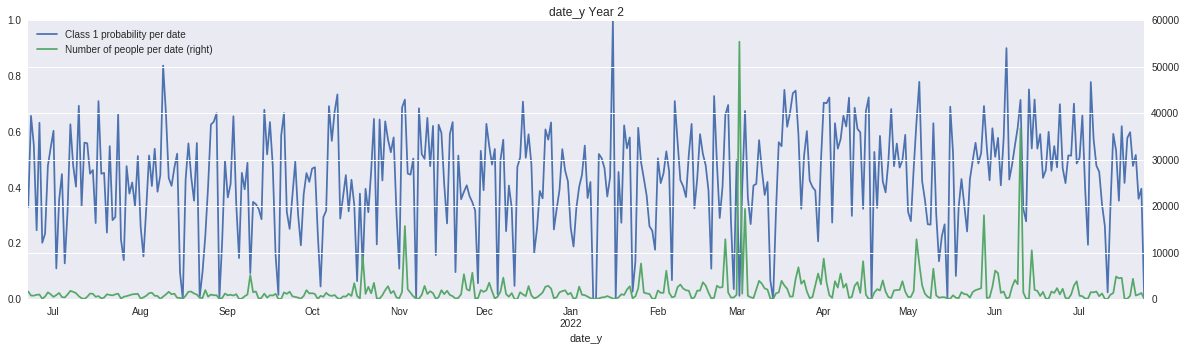

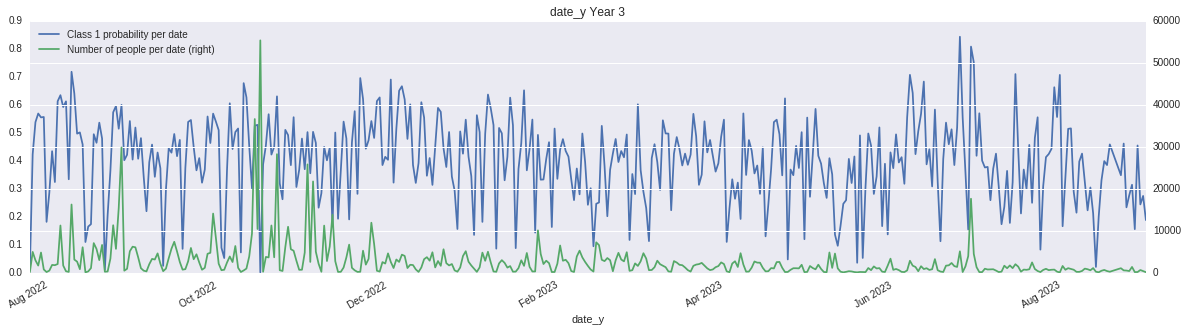

In [11]:
date_y = pd.DataFrame()
date_y['Class 1 probability per date'] = data_train.groupby('date_y')['outcome'].mean()
date_y['Number of people per date'] = data_train.groupby('date_y')['outcome'].size()
# We need to split it into multiple graphs since the time-scale is too long to show well on one graph
i = int(len(date_y) / 3)
date_y[:i].plot(secondary_y='Number of people per date', figsize=(20, 5), title='date_y Year 1')
date_y[i:2*i].plot(secondary_y='Number of people per date', figsize=(20, 5), title='date_y Year 2')
date_y[2*i:].plot(secondary_y='Number of people per date', figsize=(20, 5), title='date_y Year 3')

The blue line may answer the question: What is the probability that people who entered a specific date have performed class 1 activities?
<p>
There seems to be a weekly pattern just not so clear.
</p>

# Test set

All of the above information is useful if the same pattern appears in the test set, you can not compare the class probability graph because the test set does not show an outcome, however we can check that the distribution of samples is the same.

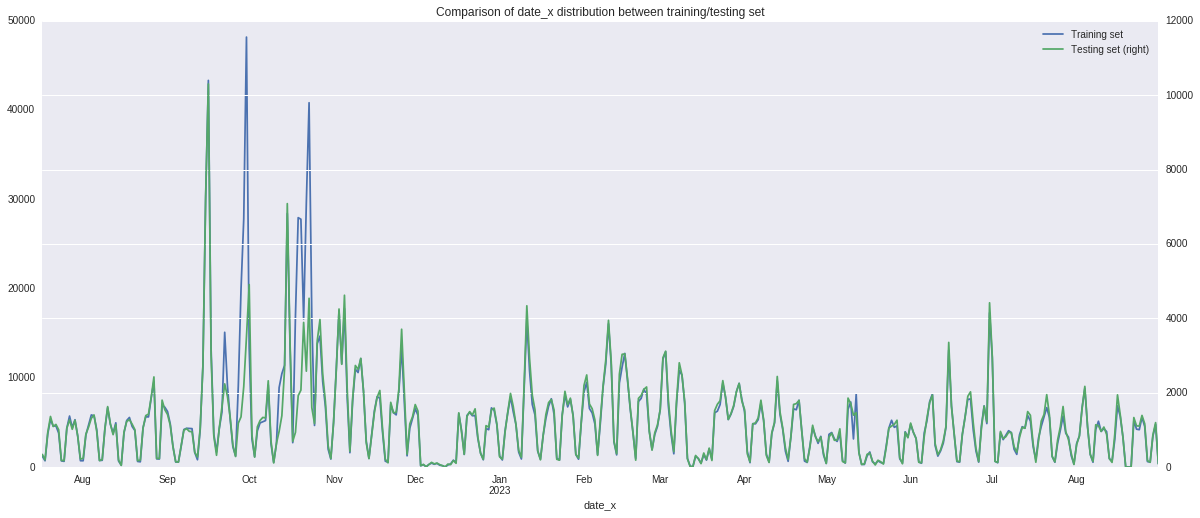

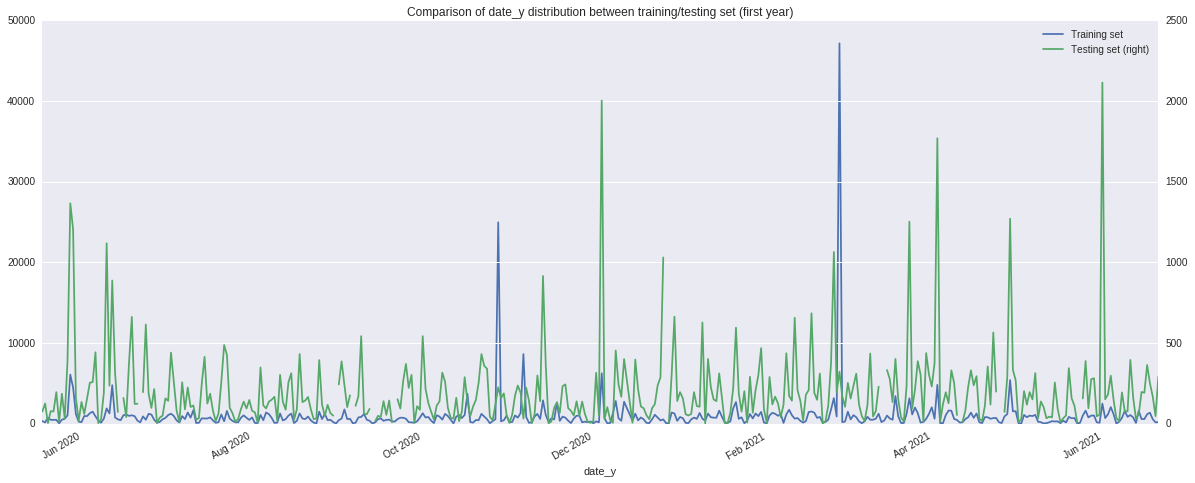

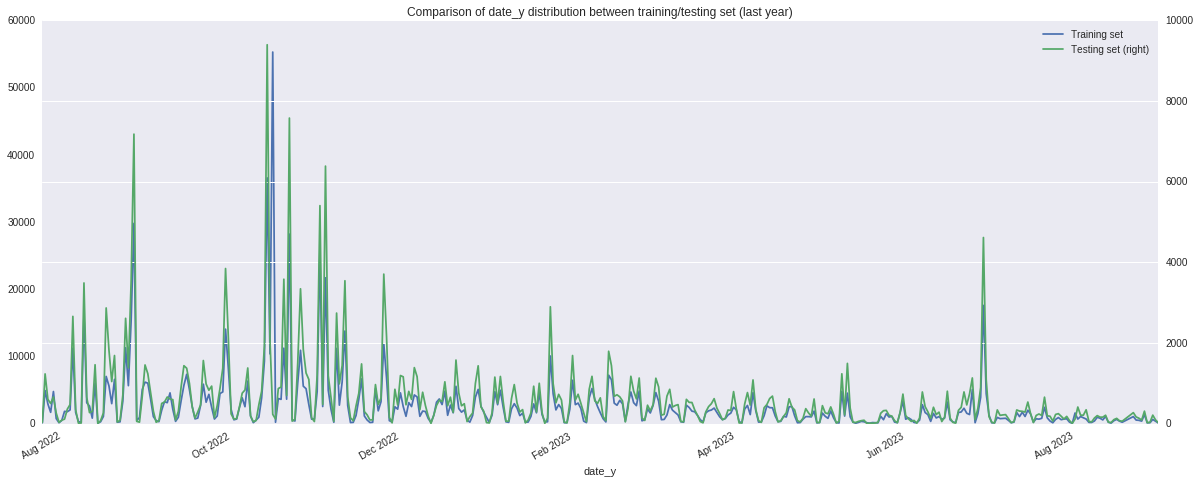

In [12]:
date_x_freq = pd.DataFrame()
date_x_freq['Training set'] = data_train.groupby('date_x')['activity_id'].count()
date_x_freq['Testing set'] = data_test.groupby('date_x')['activity_id'].count()
date_x_freq.plot(secondary_y='Testing set', figsize=(20, 8), 
                 title='Comparison of date_x distribution between training/testing set')
date_y_freq = pd.DataFrame()
date_y_freq['Training set'] = data_train.groupby('date_y')['activity_id'].count()
date_y_freq['Testing set'] = data_test.groupby('date_y')['activity_id'].count()
date_y_freq[:i].plot(secondary_y='Testing set', figsize=(20, 8), 
                 title='Comparison of date_y distribution between training/testing set (first year)')
date_y_freq[2*i:].plot(secondary_y='Testing set', figsize=(20, 8), 
                 title='Comparison of date_y distribution between training/testing set (last year)')



In [13]:
print('Correlation of date_x distribution in training/testing sets: ' + str(np.corrcoef(date_x_freq.T)[0,1]))
print('Correlation of date_y distribution in training/testing sets: ' + str(np.corrcoef(date_y_freq.fillna(0).T)[0,1]))

Correlation of date_x distribution in training/testing sets: 0.853430807691
Correlation of date_y distribution in training/testing sets: 0.709589035055


This gives us some interesting results. For date_x, we observe in the graph (and also in the high correlation value) that the training and testing sets have a very similar structure - this provides strong evidence that the training and testing sets are split based on people, and not based on time or some other unknown factor. Once again, we also observe the peaks (outliers?) in the September/October region.
However, the date_y is less clear cut. There is a low correlation between the two sets, although there is definitely some relationship that we can see visually. There appears to be very many spikes in the test set in the first year (what could this mean?) That being said, in the last year of date_y the relationship between the two sets is much more apparent. Let's try looking at the correlations over the years.

In [14]:
print('date_y correlation in year 1: ' + str(np.corrcoef(date_y_freq[:i].fillna(0).T)[0,1]))
print('date_y correlation in year 2: ' + str(np.corrcoef(date_y_freq[i:2*i].fillna(0).T)[0,1]))
print('date_y correlation in year 3: ' + str(np.corrcoef(date_y_freq[2*i:].fillna(0).T)[0,1]))

date_y correlation in year 1: 0.237056344324
date_y correlation in year 2: 0.682344221229
date_y correlation in year 3: 0.807207224857


That is definitely a huge improvement over time! Something about the structure of the first year of date_y doesn't match up.

<h3>Second exploration</h3>

In [15]:
total_good_act = np.count_nonzero(data_train['outcome'].values)
total_bad_act = len(data_train['outcome'].values) - total_good_act
print("Total good activities ", (total_good_act/len(data_train['outcome'].values))*100,"%" )
print("Total bad activities ", (total_bad_act/len(data_train['outcome'].values))*100,"%" )

Total good activities  44.3954396573 %
Total bad activities  55.6045603427 %


<h4>Number of activities by type!</h4>
<p>There are several categories of activities, a category 1 activity has more characteristics than type 2-7 activities.<p>

In [16]:
# Total jobs by type.
unique, counts = np.unique(data_train['activity_category'].values, return_counts = True)
freq_act = np.asarray((unique,counts)).T

<h4>Good and bad activities per type </h4>

In [17]:
types = ['type '+str(j) for j in range(1,8)]
ones_list,zero_list = [],[]
for m,n in enumerate(types):
    ones = (np.count_nonzero(data_train[data_train.activity_category == n]['outcome'].values))/(freq_act[:,1][m])*100
    ones_list.append(np.count_nonzero(data_train[data_train.activity_category == n]['outcome'].values))
    zero_list.append((freq_act[:,1][m])-np.count_nonzero(data_train[data_train.activity_category == n]['outcome'].values))
    print("type "+str(m+1)+"-->","Good jobs: ","%5.2f"%ones+"%", "Bad jobs:","%5.2f"%(100-ones)+"%")

type 1--> Good jobs:  41.13% Bad jobs: 58.87%
type 2--> Good jobs:  51.03% Bad jobs: 48.97%
type 3--> Good jobs:  25.20% Bad jobs: 74.80%
type 4--> Good jobs:  48.92% Bad jobs: 51.08%
type 5--> Good jobs:  48.02% Bad jobs: 51.98%
type 6--> Good jobs:  55.58% Bad jobs: 44.42%
type 7--> Good jobs:  39.97% Bad jobs: 60.03%


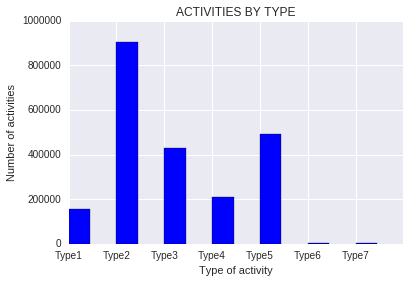

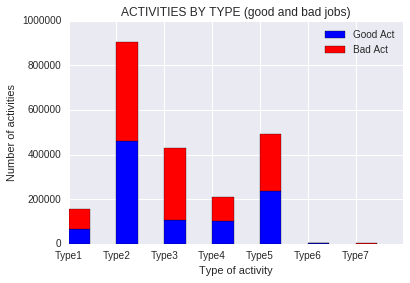

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111)
N = 7
values = freq_act[:,1]
ind = np.arange(1,N+1)
width = 0.45
bars = ax.bar(ind,values,width,color='blue')
ax.set_xlabel('Type of activity')
ax.set_ylabel('Number of activities')
ax.set_title('ACTIVITIES BY TYPE')
xTickMarks = ['Type'+str(i) for i in range(1,8)]
xtickNames = ax.set_xticklabels(xTickMarks)
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111)
N = 7
positive = ones_list
negative = zero_list
ind = np.arange(1,N+1)
width = 0.45
bars_one = ax.bar(ind,positive,width,color='blue')
bars_zero = ax.bar(ind,negative,width,color='r', bottom=positive)
ax.set_xlabel('Type of activity')
ax.set_ylabel('Number of activities')
ax.set_title('ACTIVITIES BY TYPE (good and bad jobs)')
xTickMarks = ['Type'+str(l) for l in range(1,8)]
xtickNames = ax.set_xticklabels(xTickMarks)
plt.legend((bars_one[0],bars_zero[0]),('Good Act','Bad Act'))
plt.show()

In [19]:
print ("NULLS per column in activities")
for col in data_train.columns:
    nulls = data_train[col].isnull().sum()
    print("%20s"%col, "%7d"%nulls, "(%5.2f"%(nulls*100./len(data_train))+"%)")

NULLS per column in activities
           people_id       0 ( 0.00%)
         activity_id       0 ( 0.00%)
              date_x       0 ( 0.00%)
   activity_category       0 ( 0.00%)
            char_1_x 2039676 (92.83%)
            char_2_x 2039676 (92.83%)
            char_3_x 2039676 (92.83%)
            char_4_x 2039676 (92.83%)
            char_5_x 2039676 (92.83%)
            char_6_x 2039676 (92.83%)
            char_7_x 2039676 (92.83%)
            char_8_x 2039676 (92.83%)
            char_9_x 2039676 (92.83%)
           char_10_x  157615 ( 7.17%)
             outcome       0 ( 0.00%)
            char_1_y       0 ( 0.00%)
             group_1       0 ( 0.00%)
            char_2_y       0 ( 0.00%)
              date_y       0 ( 0.00%)
            char_3_y       0 ( 0.00%)
            char_4_y       0 ( 0.00%)
            char_5_y       0 ( 0.00%)
            char_6_y       0 ( 0.00%)
            char_7_y       0 ( 0.00%)
            char_8_y       0 ( 0.00%)
            char_9_

# Number jobs per person

In [20]:
# unique_person has the id's of people who at least had a job. (train)
unique_person_train, counts_jobs_train = np.unique(data_train['people_id'].values, return_counts = True)
person_jobs_train = np.asarray((unique_person_train, counts_jobs_train)).T

# unique_person has the id's of people who at least had a job. (test)
unique_person_test, counts_jobs_test = np.unique(data_test['people_id'].values, return_counts = True)
person_jobs_test = np.asarray((unique_person_test, counts_jobs_test)).T

In [21]:
person_jobs_train

array([['ppl_100', 6],
       ['ppl_100002', 2],
       ['ppl_100003', 34],
       ..., 
       ['ppl_9999', 2],
       ['ppl_99992', 2],
       ['ppl_99994', 46]], dtype=object)

In [ ]:
people_nowork = set()
for i_people in people['people_id'].values:
    if i_people not in unique_person_train:
        people_nowork.add(i_people)

In [ ]:
print("There are:",len(people_nowork), "people who do not have any work.")

In [ ]:
index_max = np.argmax(counts_jobs_train)
print("the person with more jobs is:",person_jobs_train[index_max][0],"and its number jobs is:", person_jobs_train[index_max][1])

<h4>Check the person with ID ppl_294918</h4>

In [72]:
data_train[data_train.people_id == 'ppl_294918']

,people_id,activity_id,date_x,activity_category,char_1_x,char_2_x,char_3_x,char_4_x,char_5_x,char_6_x,...,char_29,char_30,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38
1141594,ppl_294918,act1_100854,2022-10-16,type 1,type 36,type 1,type 5,type 1,type 6,type 1,...,False,False,False,False,False,False,False,False,False,0
1141595,ppl_294918,act2_1000031,2022-10-19,type 3,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,0
1141596,ppl_294918,act2_1000104,2022-10-18,type 3,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,0
1141597,ppl_294918,act2_1000129,2022-10-19,type 3,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,0
1141598,ppl_294918,act2_1000177,2022-10-21,type 3,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,0
1141599,ppl_294918,act2_1000196,2022-10-20,type 3,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,0
1141600,ppl_294918,act2_1000338,2022-10-19,type 3,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,0
1141601,ppl_294918,act2_1000349,2022-10-18,type 3,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,0
1141602,ppl_294918,act2_100055,2022-10-19,type 3,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,0
1141603,ppl_294918,act2_1000573,2022-10-19,type 3,NaN,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,0


# Adjust the data to train. 

In [132]:
act_train_data = pd.read_csv("act_train.csv",dtype={'people_id': np.str, 'activity_id': np.str, 'outcome': np.int8}, parse_dates=['date'])
act_test_data  = pd.read_csv("act_test.csv", dtype={'people_id': np.str, 'activity_id': np.str}, parse_dates=['date'])
people_data    = pd.read_csv("people.csv", dtype={'people_id': np.str, 'activity_id': np.str, 'char_38': np.int32}, parse_dates=['date'])

In [133]:
def act_data_treatment(dsname):
    dataset = dsname
    
    for col in list(dataset.columns):
        if col not in ['people_id','date', 'char_38', 'outcome']:
            
            if dataset[col].dtype == 'object':
                if col == 'activity_id':
                    dataset[col] = dataset[col].apply(lambda y : y.split('_')[1]).astype(np.float)
                else:
                    dataset[col].fillna('type 0', inplace=True)
                    dataset[col] = dataset[col].apply(lambda x: x.split(' ')[1]).astype(np.int32)
            elif dataset[col].dtype == 'bool':
                dataset[col] = dataset[col].astype(np.int8) 
    
    dataset['year'] = dataset['date'].dt.year
    dataset['month'] = dataset['date'].dt.month
    dataset['day'] = dataset['date'].dt.day
    dataset['isweekend'] = (dataset['date'].dt.weekday >= 5).astype(int)
    dataset = dataset.drop('date', axis = 1)
    
    return dataset

In [134]:
act_train_data  = act_data_treatment(act_train_data)
act_test_data   = act_data_treatment(act_test_data)
people_data     = act_data_treatment(people_data)

In [135]:
train = act_train_data.merge(people_data, on='people_id', how='left', left_index=True)
test  = act_test_data.merge(people_data, on='people_id', how='left', left_index=True)
copy_test = test.copy()

In [82]:
train.head(10)

,people_id,activity_id,activity_category,char_1_x,char_2_x,char_3_x,char_4_x,char_5_x,char_6_x,char_7_x,...,char_33,char_34,char_35,char_36,char_37,char_38,year_y,month_y,day_y,isweekend_y
0,ppl_100,1734928.0,4,0,0,0,0,0,0,0,...,0,1,1,1,0,36,2021,6,29,0
0,ppl_100,2434093.0,2,0,0,0,0,0,0,0,...,0,1,1,1,0,36,2021,6,29,0
0,ppl_100,3404049.0,2,0,0,0,0,0,0,0,...,0,1,1,1,0,36,2021,6,29,0
0,ppl_100,3651215.0,2,0,0,0,0,0,0,0,...,0,1,1,1,0,36,2021,6,29,0
0,ppl_100,4109017.0,2,0,0,0,0,0,0,0,...,0,1,1,1,0,36,2021,6,29,0
0,ppl_100,898576.0,4,0,0,0,0,0,0,0,...,0,1,1,1,0,36,2021,6,29,0
1,ppl_100002,1233489.0,2,0,0,0,0,0,0,0,...,1,1,1,1,0,76,2021,1,6,0
1,ppl_100002,1623405.0,2,0,0,0,0,0,0,0,...,1,1,1,1,0,76,2021,1,6,0
2,ppl_100003,1111598.0,2,0,0,0,0,0,0,0,...,1,1,0,1,1,99,2022,6,10,0
2,ppl_100003,1177453.0,2,0,0,0,0,0,0,0,...,1,1,0,1,1,99,2022,6,10,0


In [48]:
test.head()

,people_id,activity_id,activity_category,char_1_x,char_2_x,char_3_x,char_4_x,char_5_x,char_6_x,char_7_x,...,char_33,char_34,char_35,char_36,char_37,char_38,year_y,month_y,day_y,isweekend_y
3,ppl_100004,249281.0,1,5,10,5,1,6,1,1,...,1,1,1,1,1,76,2022,7,20,0
3,ppl_100004,230855.0,5,0,0,0,0,0,0,0,...,1,1,1,1,1,76,2022,7,20,0
5,ppl_10001,240724.0,1,12,1,5,4,6,1,1,...,1,1,1,1,1,90,2022,10,14,0
5,ppl_10001,83552.0,1,20,10,5,4,6,1,1,...,1,1,1,1,1,90,2022,10,14,0
5,ppl_10001,1043301.0,5,0,0,0,0,0,0,0,...,1,1,1,1,1,90,2022,10,14,0


In [83]:
del act_train_data
del act_test_data
del people_data

In [84]:
train=train.sort_values(['people_id'], ascending=[1])
test=test.sort_values(['people_id'], ascending=[1])

In [85]:
test.head(10)

,people_id,activity_id,activity_category,char_1_x,char_2_x,char_3_x,char_4_x,char_5_x,char_6_x,char_7_x,...,char_33,char_34,char_35,char_36,char_37,char_38,year_y,month_y,day_y,isweekend_y
3,ppl_100004,249281.0,1,5,10,5,1,6,1,1,...,1,1,1,1,1,76,2022,7,20,0
3,ppl_100004,230855.0,5,0,0,0,0,0,0,0,...,1,1,1,1,1,76,2022,7,20,0
5,ppl_10001,688604.0,5,0,0,0,0,0,0,0,...,1,1,1,1,1,90,2022,10,14,0
5,ppl_10001,659237.0,5,0,0,0,0,0,0,0,...,1,1,1,1,1,90,2022,10,14,0
5,ppl_10001,649143.0,5,0,0,0,0,0,0,0,...,1,1,1,1,1,90,2022,10,14,0
5,ppl_10001,596561.0,5,0,0,0,0,0,0,0,...,1,1,1,1,1,90,2022,10,14,0
5,ppl_10001,584216.0,5,0,0,0,0,0,0,0,...,1,1,1,1,1,90,2022,10,14,0
5,ppl_10001,4649285.0,5,0,0,0,0,0,0,0,...,1,1,1,1,1,90,2022,10,14,0
5,ppl_10001,4397847.0,5,0,0,0,0,0,0,0,...,1,1,1,1,1,90,2022,10,14,0
5,ppl_10001,4167474.0,5,0,0,0,0,0,0,0,...,1,1,1,1,1,90,2022,10,14,0


<h3>Note:</h3>
<p>The training model will be added columns of year, month, day and weekend for both activities and people because we saw some weeks pattern important in the previous charts.<p>

In [86]:
train.fillna(0, inplace=True)
test.fillna(0, inplace=True)

In [87]:
y = train.outcome
train=train.drop('outcome',axis=1)

In [88]:
train=train.drop('people_id',axis=1)
test=test.drop('people_id',axis=1)


# Classifiers

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

from sklearn.cross_validation import train_test_split, KFold, cross_val_score

<h3>Learning curves</h3>(with one million data)

In [70]:
def learning_curve_or_tree_progress(x_train,y_train,type_graph = "lc",algorithm = None):
    
    if type_graph == "tp":
        max_depths = range(1,21)
        r = np.array([(np.mean(j), np.std(j)) for j in [cross_val_score(RandomForestClassifier(max_depth=i),x_train[:1000000],y_train[:1000000],cv=KFold(len(x_train[:1000000]), 5)) for i in max_depths]])
        plt.plot(max_depths, r[:,0], "o-", color="green", label="test")
        plt.fill_between(max_depths, r[:,0]-r[:,1], r[:,0]+r[:,1], color="green", alpha=.2)
        plt.xlabel("Max depth of the algorithm.")
        plt.ylabel("accuracy")
        plt.grid(True);
        green_line = mlines.Line2D([], [], color='green',label='test')
        plt.legend(handles=[green_line])

        plt.show()
        
    else:
        quantity = range(100000,1100000,100000)
    
        train_scores = [algorithm.fit(x_train[:quty],y_train[:quty]).score(x_train[:quty],y_train[:quty]) for quty in quantity]
    
        test_scores = [algorithm.fit(x_train[:quty],y_train[:quty]).score(x_train[-quty:],y_train[-quty:]) for quty in quantity]
    
        plt.plot(quantity, train_scores, "o-", color="green", label="train")
        plt.plot(quantity, test_scores, "o-", color="red", label="test")
        plt.grid(True);
        plt.xlabel("Amount of data")
        plt.ylabel("score")
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        plt.show()

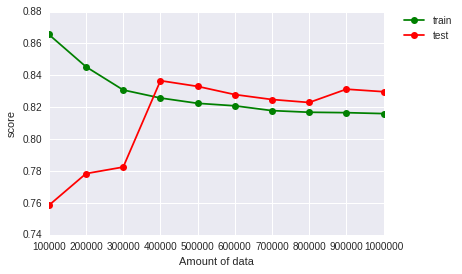

In [63]:
# Learning curve for logistic regression
logreg = LogisticRegression()
learning_curve_or_tree_progress(train[:2000000],y[:2000000],"lc",logreg)

<p>For this algorithm we see that it has high BIAS, we could try to solve it by adding more  characteristics (columns), transforming some characteristics or changing classification algorithm.</p>

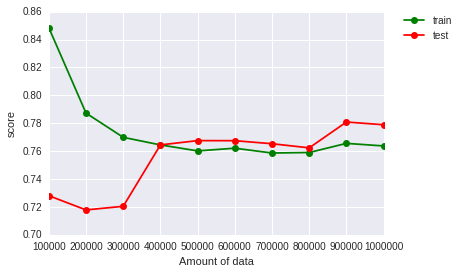

In [64]:
# Learning curve for Gaussian classifier
gaussiannb = GaussianNB()
learning_curve_or_tree_progress(train[:2000000],y[:2000000],"lc",gaussiannb)

The performance of this algorithm is slightly smaller than the previous one, it presents high BIAS and we see that it presents considerable improvement when increasing the amount of data.

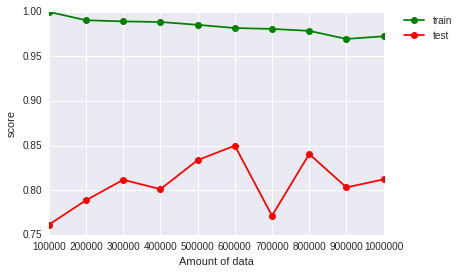

In [65]:
# Learning curve for Decision Tree classifier
dt = DecisionTreeClassifier(max_depth=20)
learning_curve_or_tree_progress(train[:2000000],y[:2000000],"lc",dt)

For this algorithm different results are presented, the classification tree is much adjusted to the training data, consequently there is a high variance (overfitting), it could be solved by adding more data (row) or decrease columns.

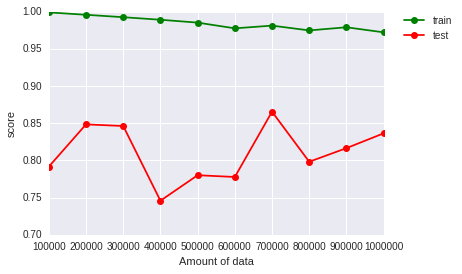

In [67]:
# Learning curve for Random Forest classifier
random_forest_clasf = RandomForestClassifier(max_depth = 20)
learning_curve_or_tree_progress(train[:2000000],y[:2000000],"lc",random_forest_clasf)

Results for this algorithm very similar to the decision tree, this is the one that has obtained the highest score in tests.

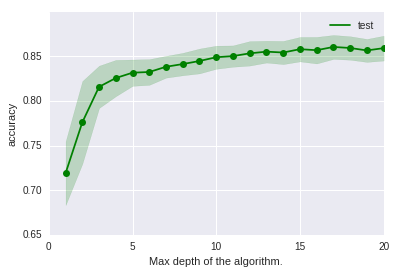

In [71]:
# Performance curve according to depth for Random Forest classifier
learning_curve_or_tree_progress(train[:2000000],y[:2000000],"tp")

# Predictions 

The predictions will be done with the algorithm Random Forest because it was the one with the highest score.

In [73]:
y_predict = random_forest_clasf.predict(test)

In [204]:
copy_test.head()

,people_id,activity_id,activity_category,char_1_x,char_2_x,char_3_x,char_4_x,char_5_x,char_6_x,char_7_x,...,char_33,char_34,char_35,char_36,char_37,char_38,year_y,month_y,day_y,isweekend_y
3,ppl_100004,249281.0,1,5,10,5,1,6,1,1,...,1,1,1,1,1,76,2022,7,20,0
3,ppl_100004,230855.0,5,0,0,0,0,0,0,0,...,1,1,1,1,1,76,2022,7,20,0
5,ppl_10001,240724.0,1,12,1,5,4,6,1,1,...,1,1,1,1,1,90,2022,10,14,0
5,ppl_10001,83552.0,1,20,10,5,4,6,1,1,...,1,1,1,1,1,90,2022,10,14,0
5,ppl_10001,1043301.0,5,0,0,0,0,0,0,0,...,1,1,1,1,1,90,2022,10,14,0


In [198]:
# Predictions in commercial value of the first 20 people, the indices correspond to the same indices in copy_test.
index_uniq = test.index.unique()
start = 0
for i_,ind_uq in enumerate(index_uniq[:20]):
    value = len((test.loc[ind_uq].index).values)
    act_positive = np.count_nonzero(y_predict[start:value+start])
    start = value + start
    if act_positive/value == 0.5:
        print("The person with the index: "+str(ind_uq)+" has a regular commercial value.")
    elif act_positive/value > 0.5:
        print("The person with the index: "+str(ind_uq)+" has a good commercial value.")
    elif act_positive/value < 0.5:
        print("The person with the index: "+str(ind_uq)+" has a bad commercial value.")
    
    

The person with the index: 3 has a regular commercial value.
The person with the index: 5 has a good commercial value.
The person with the index: 6 has a bad commercial value.
The person with the index: 20 has a good commercial value.
The person with the index: 24 has a bad commercial value.
The person with the index: 36 has a bad commercial value.
The person with the index: 43 has a bad commercial value.
The person with the index: 48 has a bad commercial value.
The person with the index: 52 has a bad commercial value.
The person with the index: 54 has a bad commercial value.
The person with the index: 58 has a bad commercial value.
The person with the index: 59 has a bad commercial value.
The person with the index: 65 has a bad commercial value.
The person with the index: 72 has a bad commercial value.
The person with the index: 73 has a bad commercial value.
The person with the index: 75 has a bad commercial value.
The person with the index: 82 has a bad commercial value.
The person 

<h3>CONCLUSIONS:</h3>
Based on the results obtained, we conclude that:
<ul>
<li>Try applying dimensionality reduction techniques such as PCA to reduce the number of features.</li>
<li>Add more data (rows) for the training process.</li>
<li>Eliminate some characteristics based on the other results obtained in the EDA process, without using PCA.</li>
</ul>

In [ ]:
#svc = SVC(kernel="poly", degree=1)
#svc.fit(train[:500000], y[:500000])

In [ ]:
#svc = SVC(kernel="rbf", gamma=.1)
#svc.fit(train,y)